In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv('A:\Bootcamp\Jupyter\Shift Academy\dataset\data_titanic.csv')

In [3]:
#initial check
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA

### Cleaning Data

**Check Duplicate Data**

In [6]:
df.duplicated().any() #check duplicated data using overall features

False

In [7]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


**Check for Missing Value**

In [8]:
df.isnull().sum()
#df.isna().sum() alternative

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
round(df.isnull().sum()/df.shape[0]*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Cabin

Karena proporsi missing value dari Cabin sebesar 77.1% maka, kita hapus atau drop kolom cabin. 
Namun ini bukan "best practice" karena mengurangi sample data yang dapat digunakan untuk prediksi

In [10]:
#drop cabin
df.drop('Cabin', axis=1, inplace=True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Age

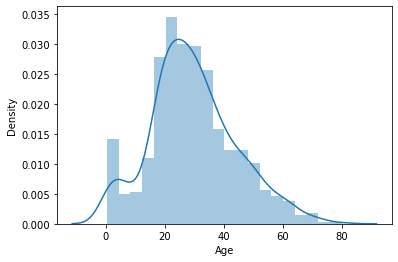

In [12]:
#check distribusi dari data
sns.distplot(df['Age'])

In [13]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
#mengganti missing value di kolom 'Age' dengan mean
mean_age = round(df['Age'].mean())

df['Age'] = df['Age'].fillna(mean_age)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Embarked

In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

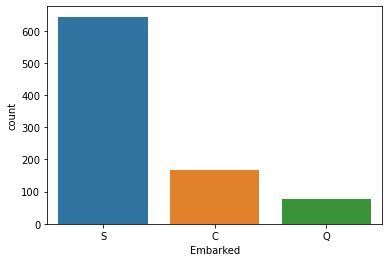

In [17]:
#check for composition
sns.countplot(df['Embarked'])

In [18]:
#mengganti nan values pada embarked dengan modus

mode_emb = df['Embarked'].mode()[0]

df['Embarked'] = df['Embarked'].fillna(mode_emb)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Checking for Outliers**

In [20]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


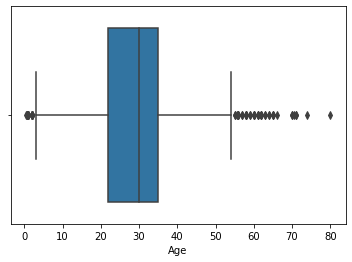

In [21]:
sns.boxplot(df['Age'])

In [22]:
df[df['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


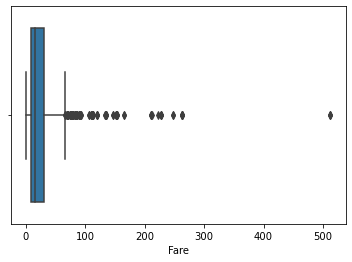

In [23]:
sns.boxplot(df['Fare'])

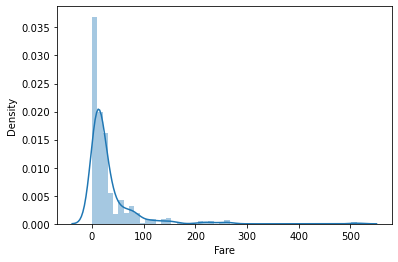

In [24]:
sns.distplot(df['Fare'])

In [25]:
df[df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


**Tipe Data**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**Membuat Beberapa Visualisasi**

Bagaimana komposisi penumpang yang selamat dan tidak selamat?

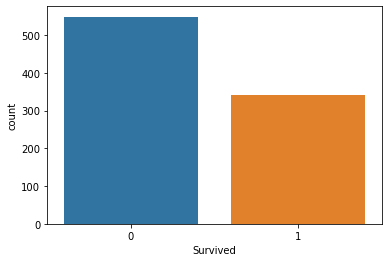

In [27]:
sns.countplot(df['Survived'])

Apakah orang yang lebih tua cenderung tidak selamat?

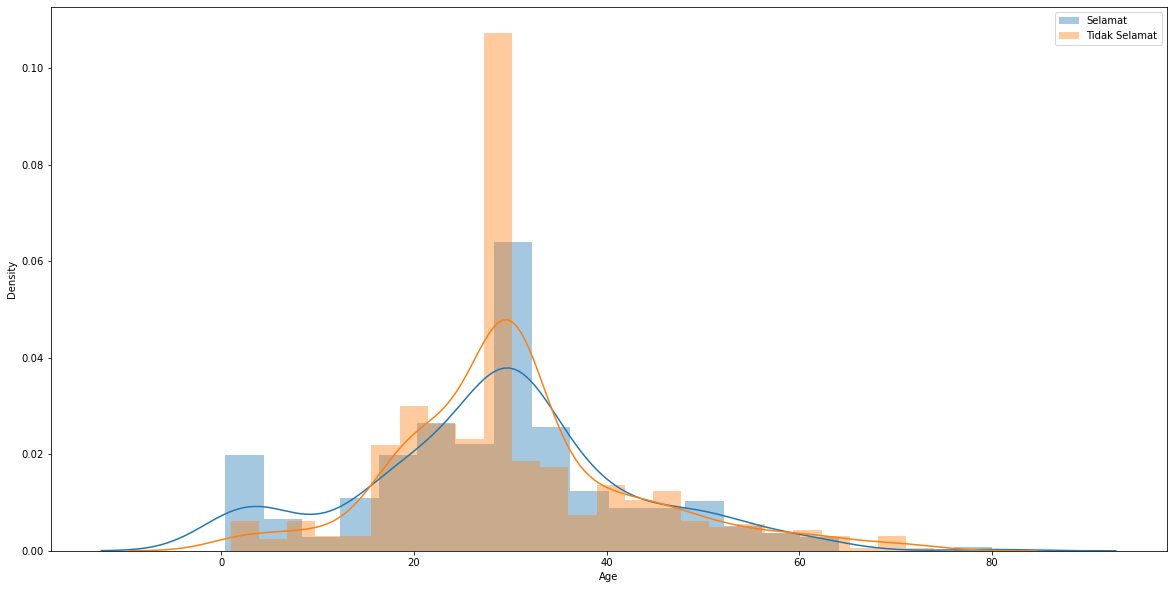

In [28]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['Survived']==1]['Age'], label='Selamat')
sns.distplot(df[df['Survived']==0]['Age'], label='Tidak Selamat')
plt.legend()

Apakah gender tertentu cenderung selamat dibanding gender yang lain?

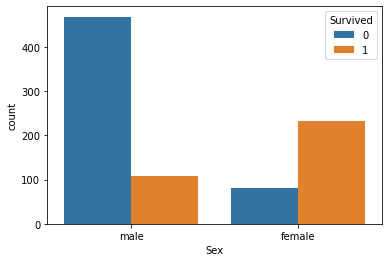

In [29]:
sns.countplot(df['Sex'], hue=df['Survived'])

Bagaimana Pengaruh Biaya terhadap Target?

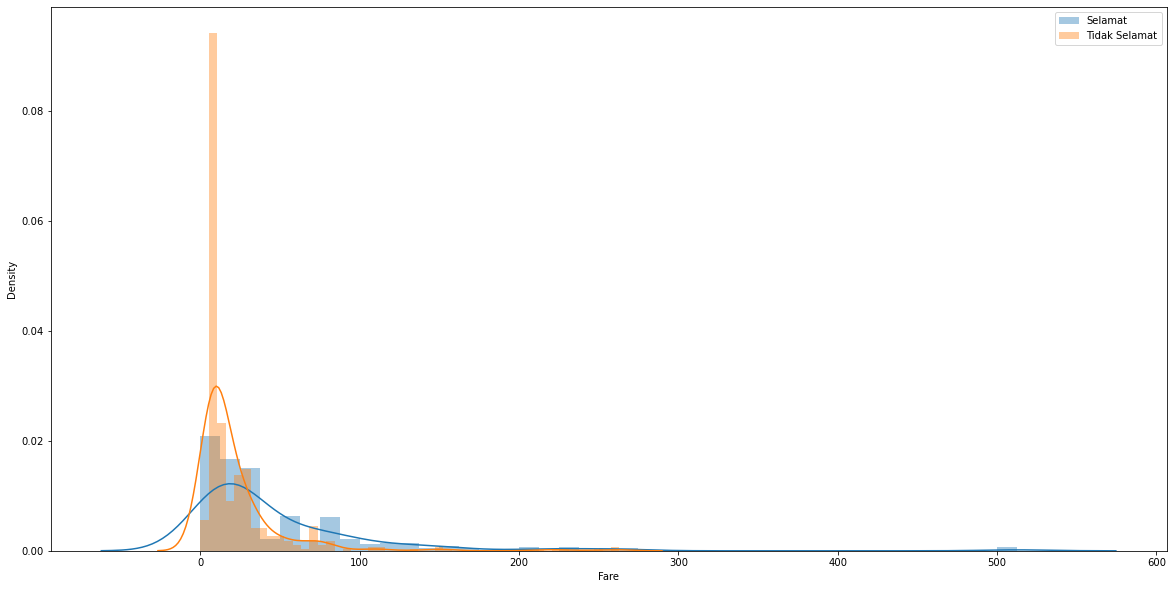

In [30]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['Survived']==1]['Fare'], label='Selamat')
sns.distplot(df[df['Survived']==0]['Fare'], label='Tidak Selamat')
plt.legend()

### Data Preprocessing

In [31]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [32]:
#drop columns (PassengerId, Name, Ticket)

df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [33]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


Sex

In [34]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
lE = LabelEncoder()
df['Sex'] = lE.fit_transform(df['Sex'])

In [37]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S


Embarked

In [38]:
df = pd.get_dummies(df, columns=['Embarked'], prefix=['emb'])

In [39]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,emb_C,emb_Q,emb_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1


Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
df['Fare'] = scaler.fit_transform(np.array(df['Fare']).reshape(-1,1))

In [43]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,emb_C,emb_Q,emb_S
0,0,3,1,22.0,1,0,0.014151,0,0,1
1,1,1,0,38.0,1,0,0.139136,1,0,0
2,1,3,0,26.0,0,0,0.015469,0,0,1


In [44]:
df['Age'] = scaler.fit_transform(np.array(df['Age']).reshape(-1,1))

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,emb_C,emb_Q,emb_S
0,0,3,1,0.271174,1,0,0.014151,0,0,1
1,1,1,0,0.472229,1,0,0.139136,1,0,0
2,1,3,0,0.321438,0,0,0.015469,0,0,1
3,1,1,0,0.434531,1,0,0.103644,0,0,1
4,0,3,1,0.434531,0,0,0.015713,0,0,1


### Train Test Split

In [46]:
X = df.drop('Survived', axis=1) #features/ independent variables
y = df['Survived'] #target column

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,emb_C,emb_Q,emb_S
331,1,1,0.566474,0,0,0.055628,0,0,1
733,2,1,0.283740,0,0,0.025374,0,0,1
382,3,1,0.396833,0,0,0.015469,0,0,1
704,3,1,0.321438,1,0,0.015330,0,0,1
813,3,0,0.070118,4,2,0.061045,0,0,1


In [50]:
X_train.shape

(712, 9)

In [51]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,emb_C,emb_Q,emb_S
709,3,1,0.371701,1,1,0.029758,1,0,0
439,2,1,0.384267,0,0,0.020495,0,0,1
840,3,1,0.246042,0,0,0.015469,0,0,1
720,2,0,0.070118,0,1,0.064412,0,0,1
39,3,0,0.170646,1,0,0.021942,1,0,0


In [52]:
X_test.shape

(179, 9)